In [1]:
# import all library required
import pandas as pd
import numpy as np
from numpy import nan
import sklearn
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time
from sklearn import datasets
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize
from sklearn import tree
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('appstore_games.csv')
df.head()
df.shape

(17007, 18)

# This dataset contain information on 17007 strategy games found on Apple App store on 3rd August 2019.It contains 16 variables, including the average user rating for the game. Our group intend to use the average user rating as a meaure of success and see if we can predict whether a game can be successful based on the other variables using Machine learning.

# 1. Feature engineering
# To make the dataset usable, we decided to do some feature engineering to make some of the feature more useful.

# 1.1. The in app purchases column shows the prices of available in-app purchases, for ML algorithm to work, we will change the column to 0,1 to indicate if in-app purchases is available. Next we drop the row with Nan value 

In [3]:
df.loc[df['In-app Purchases'].notnull() ,'In-app Purchases'] = 1
df.loc[df['In-app Purchases'].isnull() ,'In-app Purchases'] = 0
df= df.dropna()
df.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
5,https://apps.apple.com/us/app/sudoku-classic-n...,286210009,Sudoku - Classic number puzzle,Original brain training,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.0,47.0,0.00,1,"Sudoku will tease your brain, challenge you or...",OutOfTheBit Ltd,4+,EN,48672768.0,Games,"Games, Entertainment, Strategy, Puzzle",30/07/2008,29/04/2019
19,https://apps.apple.com/us/app/cool-sudoku-jigs...,290614255,"Cool Sudoku, Jigsaw, Killer","Sudoku, Jigsaw, Killer, Kakuro",https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.5,357.0,0.00,1,"You can now play Sudoku, Killer Sudoku, Jigsaw...",Splash Software Ltd.,4+,EN,52236288.0,Games,"Games, Strategy, Puzzle, Entertainment",24/09/2008,26/04/2019
27,https://apps.apple.com/us/app/lux-touch-3-worl...,292538570,Lux Touch 3 - World Domination,Game of Global Conquest,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,72428.0,0.00,0,Lux is a game of strategy and world conquest!\...,Sillysoft Games,9+,EN,55071744.0,Games,"Games, Entertainment, Strategy, Board",7/10/2008,23/01/2019
33,https://apps.apple.com/us/app/chess-tchess-pro...,295445501,Chess - tChess Pro,For beginners to professionals,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3062.0,7.99,0,"tChess Pro is the high-quality, critically acc...",Tom Kerrigan,4+,"EN, FR, DE, JA, KO, ZH",7517184.0,Games,"Games, Board, Entertainment, Strategy",5/11/2008,7/04/2019
36,https://apps.apple.com/us/app/chess-tchess-lit...,296756437,Chess - tChess Lite,Fun and easy to use,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,5488.0,0.99,0,tChess Lite is the popular chess game designed...,Tom Kerrigan,4+,"EN, FR, DE, JA, KO, ZH",5874688.0,Games,"Games, Strategy, Entertainment, Board",15/11/2008,7/04/2019


In [4]:
df.shape

(2714, 18)

In [5]:
# Reset index as rows were removed
df.reset_index(drop = True,inplace = True)

# 1.2. The 'Language' column shows the list of language the app is translated to. We will instead do a count of the number of languages.

In [6]:
df['Languages'] = df['Languages'].str.split(',').str.len()

In [7]:
df['Languages'].apply(lambda x: int(x))

0       1
1       1
2       1
3       6
4       6
       ..
2709    1
2710    2
2711    1
2712    1
2713    1
Name: Languages, Length: 2714, dtype: int64

# 1.3. We also think that we can derived the number of days since this app is released in store from the 'Original Release Date' feature, which we believe is a more meaningful feature.

In [8]:
from datetime import datetime
datetime.strptime(df.loc[1,'Original Release Date'],'%d/%m/%Y')

datetime.datetime(2008, 9, 24, 0, 0)

In [9]:
Num_of_days =[]
Data_collection_date = datetime.strptime( '03/08/2019', '%d/%m/%Y')
for d in df['Original Release Date']:
    x = datetime.strptime(d,'%d/%m/%Y')
    days = (Data_collection_date -x)
    Num_of_days.append(days.days)
    
df['Num_of_days'] = Num_of_days
df['Num_of_days'].head()
    

0    4021
1    3965
2    3952
3    3923
4    3913
Name: Num_of_days, dtype: int64

# 1.4. Encode "Age Rating"

In [10]:
df.loc[df['Age Rating'] == "4+",'Age Rating'] = 1
df.loc[df['Age Rating'] == "9+",'Age Rating'] = 2
df.loc[df['Age Rating'] == "12+",'Age Rating'] = 3
df.loc[df['Age Rating'] == "17+",'Age Rating'] = 4

# 1.5. Encode "Average User Rating" .2.5 and below will be 1, 3.0 to 4.0 will be 2 and 4.5 & 5.0 will be 3

In [11]:
df.loc[df['Average User Rating'] == 0.0,'Average User Rating'] = 1
df.loc[df['Average User Rating'] == 0.5,'Average User Rating'] = 1
df.loc[df['Average User Rating'] == 1.0,'Average User Rating'] = 1
df.loc[df['Average User Rating'] == 1.5,'Average User Rating'] = 1
df.loc[df['Average User Rating'] == 2.0,'Average User Rating'] = 1
df.loc[df['Average User Rating'] == 2.5,'Average User Rating'] = 1
df.loc[df['Average User Rating'] == 3.0,'Average User Rating'] = 2
df.loc[df['Average User Rating'] == 3.5,'Average User Rating'] = 2
df.loc[df['Average User Rating'] == 4.0,'Average User Rating'] = 2
df.loc[df['Average User Rating'] == 4.5,'Average User Rating'] = 3
df.loc[df['Average User Rating'] == 5.0,'Average User Rating'] = 3

In [12]:
df['Average User Rating'].unique()

array([2., 1., 3.])

In [13]:
df.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,Num_of_days
0,https://apps.apple.com/us/app/sudoku-classic-n...,286210009,Sudoku - Classic number puzzle,Original brain training,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,2.0,47.0,0.00,1,"Sudoku will tease your brain, challenge you or...",OutOfTheBit Ltd,1,1,48672768.0,Games,"Games, Entertainment, Strategy, Puzzle",30/07/2008,29/04/2019,4021
1,https://apps.apple.com/us/app/cool-sudoku-jigs...,290614255,"Cool Sudoku, Jigsaw, Killer","Sudoku, Jigsaw, Killer, Kakuro",https://is5-ssl.mzstatic.com/image/thumb/Purpl...,2.0,357.0,0.00,1,"You can now play Sudoku, Killer Sudoku, Jigsaw...",Splash Software Ltd.,1,1,52236288.0,Games,"Games, Strategy, Puzzle, Entertainment",24/09/2008,26/04/2019,3965
2,https://apps.apple.com/us/app/lux-touch-3-worl...,292538570,Lux Touch 3 - World Domination,Game of Global Conquest,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,2.0,72428.0,0.00,0,Lux is a game of strategy and world conquest!\...,Sillysoft Games,2,1,55071744.0,Games,"Games, Entertainment, Strategy, Board",7/10/2008,23/01/2019,3952
3,https://apps.apple.com/us/app/chess-tchess-pro...,295445501,Chess - tChess Pro,For beginners to professionals,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,2.0,3062.0,7.99,0,"tChess Pro is the high-quality, critically acc...",Tom Kerrigan,1,6,7517184.0,Games,"Games, Board, Entertainment, Strategy",5/11/2008,7/04/2019,3923
4,https://apps.apple.com/us/app/chess-tchess-lit...,296756437,Chess - tChess Lite,Fun and easy to use,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,2.0,5488.0,0.99,0,tChess Lite is the popular chess game designed...,Tom Kerrigan,1,6,5874688.0,Games,"Games, Strategy, Entertainment, Board",15/11/2008,7/04/2019,3913


# 1.6. We also drop some columns of text that we are not using in our analysis

In [14]:
list_to_drop =['URL','ID','Name','Subtitle','Icon URL','Description','Developer','Primary Genre','Genres','Original Release Date','Current Version Release Date'] 
df = df.drop(list_to_drop,axis =1)
df

,Average User Rating,User Rating Count,Price,In-app Purchases,Age Rating,Languages,Size,Num_of_days
0,2.0,47.0,0.00,1,1,1,48672768.0,4021
1,2.0,357.0,0.00,1,1,1,52236288.0,3965
2,2.0,72428.0,0.00,0,2,1,55071744.0,3952
3,2.0,3062.0,7.99,0,1,6,7517184.0,3923
4,2.0,5488.0,0.99,0,1,6,5874688.0,3913
...,...,...,...,...,...,...,...,...
2709,3.0,11.0,0.00,1,2,1,44067840.0,2
2710,2.0,6.0,0.00,0,3,2,151308288.0,3
2711,3.0,51.0,0.00,0,2,1,125348864.0,3
2712,3.0,5.0,0.00,0,1,1,128687104.0,6


# 1.7. Looking at the correlation score between features, we can see that there isn't a pair of data with high correlation. Thus we will not drop anymore data.

In [15]:
df.drop(['Average User Rating'],axis = 1).corr()

,User Rating Count,Price,In-app Purchases,Age Rating,Languages,Size,Num_of_days
User Rating Count,1.000000,-0.012381,0.049302,0.032601,0.109312,0.038752,0.072137
Price,-0.012381,1.000000,-0.142877,-0.022743,-0.021021,0.083053,0.089246
In-app Purchases,0.049302,-0.142877,1.000000,0.094482,0.159922,0.091998,-0.034194
Age Rating,0.032601,-0.022743,0.094482,1.000000,0.098492,0.264204,-0.137601
Languages,0.109312,-0.021021,0.159922,0.098492,1.000000,0.082961,0.089909
Size,0.038752,0.083053,0.091998,0.264204,0.082961,1.000000,-0.167403
Num_of_days,0.072137,0.089246,-0.034194,-0.137601,0.089909,-0.167403,1.000000


# 2. Training classification models

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X = df.drop(['Average User Rating'],axis =1)
y = df['Average User Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [17]:
df['Average User Rating'].head()

0    2.0
1    2.0
2    2.0
3    2.0
4    2.0
Name: Average User Rating, dtype: float64

In [18]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

# 2.1 KNN model

# 2.1.1.Train model with different K values

In [19]:
K_values = np.arange(start = 3, stop = 40, step = 4)
i = 0
# create 2 list to store accuracy
acc = np.zeros(K_values.shape[0])
cross_val_acc = np.zeros(K_values.shape[0])
# create 2 lists to store the model training duration and prediction duration
train_duration = np.zeros(K_values.shape[0])
predict_duration = np.zeros(K_values.shape[0])
# create a list to store all the confusion matrices
a =np.matrix('0 0;0 0')
Con_Mat_list = [a]*(K_values.shape[0])

In [20]:
for n in K_values:
    
    start_time = time.time()
    Kneigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    train_duration[i] = time.time() - start_time
    start_time = time.time()
    y_hat = Kneigh.predict(X_test)
    predict_duration[i] = time.time() - start_time
    acc[i] = accuracy_score(y_test, y_hat)
    score=cross_val_score(Kneigh, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy',error_score=np.nan)
    cross_val_acc[i]= round(np.mean(score)*100, 2)
    Con_Mat_list[i] = confusion_matrix(y_test,y_hat)
    i +=1
  

In [21]:
cross_val_acc

array([52.78, 56.47, 58.33, 60.2 , 61.43, 61.68, 61.82, 61.87, 62.46,
       62.36])

In [22]:
acc

array([0.52724595, 0.58468336, 0.60235641, 0.60972018, 0.62150221,
       0.60088365, 0.60824742, 0.60972018, 0.60824742, 0.61413844])

# 2.1.2 Evaluation of the KNN model

# Looking at the accuracy score array above, the highest accuracy score is around 62% when K is 19.
# After that, increasing the K does not results in improvement in accuracy.
# We will examine the performance of model when K is 19 further.

In [23]:
train_duration[4] # In seconds

0.001995563507080078

In [24]:
predict_duration[4] # In seconds

0.020947933197021484

In [25]:
# Define a function to calculate the accuracy for predicting each class
def Analyse_Con_Mat(CM):
    Acc_1 = CM.item(0) /(CM.item(0)+ CM.item(1)+CM.item(2))
    Acc_2 = CM.item(4) /(CM.item(3)+ CM.item(4)+ CM.item(5))
    Acc_3 = CM.item(8) /(CM.item(6)+ CM.item(7)+ CM.item(8))
                               
    print( "Acc_1 = {0}, Acc_2 = {1}, Acc_3 = {2}".format(Acc_1,Acc_2,Acc_3))

In [26]:
Analyse_Con_Mat(Con_Mat_list[4])

Acc_1 = 0.0, Acc_2 = 0.14601769911504425, Acc_3 = 0.9218009478672986


# 2.2. Decision tree model

In [27]:
clf = tree.DecisionTreeClassifier()
start_time = time.time()
clf.fit(X_train,y_train)
train_duration = time.time() - start_time
y_pred = clf.predict(X_test)

DT_acc = accuracy_score(y_test, y_pred)
DT_Con_Mat_= confusion_matrix(y_test,y_pred)

In [28]:
DT_acc 

0.5699558173784978

In [31]:
train_duration

0.016956567764282227

In [46]:
DT_Con_Mat_

array([[  7,  14,  10],
       [ 14,  88, 124],
       [ 16, 119, 287]], dtype=int64)

In [47]:
Analyse_Con_Mat(DT_Con_Mat_)

Acc_1 = 0.22580645161290322, Acc_2 = 0.3893805309734513, Acc_3 = 0.6800947867298578


# 2.3. Logistic Regression Model

In [48]:
logReg = LogisticRegression(solver = 'lbfgs')
start_time = time.time()
logReg.fit(X_train,y_train)
train_duration = time.time() - start_time
y_pred_LR = logReg.predict(X_test)
LR_acc = accuracy_score(y_test, y_pred_LR)
LR_Con_Mat_= confusion_matrix(y_test,y_pred_LR)

C:\Users\Py\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [49]:
train_duration

0.03988957405090332

In [50]:
LR_acc

0.6215022091310751

In [51]:
LR_Con_Mat_

array([[  0,   0,  31],
       [  0,   0, 226],
       [  0,   0, 422]], dtype=int64)

In [52]:
Analyse_Con_Mat(LR_Con_Mat_)

Acc_1 = 0.0, Acc_2 = 0.0, Acc_3 = 1.0


# Looking at the confusion matrix, most of the correct predictions came from the class '3' (rating = 4.5 or 5.0).

# Looking at the dataset, it is imbalanced, with most of the sample belonging to class '3'. We will need to do data balancing to improve the model. We also want to explore if we can improve the result by standardise the datal.  

In [53]:
df['Average User Rating'].value_counts()

3.0    1728
2.0     867
1.0     119
Name: Average User Rating, dtype: int64

# 3. Data balancing and standardisation

# 3.1. Data balancing by under-sampling and over-sampling

In [54]:
# We picked 238 samples from class 3 and 2, then we use 2 sets of class 1 samples together to create a new unbiased dataset
df_3 = df[df['Average User Rating'] == 3]
df_3 = df_3.sample(n = 238,random_state = 42)
df_2 = df[df['Average User Rating'] == 2]
df_2 = df_2.sample(n = 238,random_state = 42)
df_1 = df[df['Average User Rating'] == 1]
df_1 = pd.concat([df_1]*2)

In [55]:
df_unbiased = pd.concat([df_1,df_2,df_3])

In [56]:
df_unbiased = df_unbiased.reset_index(drop = True)

In [57]:
df_unbiased

,Average User Rating,User Rating Count,Price,In-app Purchases,Age Rating,Languages,Size,Num_of_days
0,1.0,359.0,5.99,0,1,1,33982464.0,3819
1,1.0,5462.0,0.00,1,2,1,14125056.0,3811
2,1.0,18.0,0.00,0,1,1,75976704.0,3544
3,1.0,6630.0,0.00,0,1,1,8592384.0,3545
4,1.0,119.0,0.00,0,1,1,46803968.0,3503
...,...,...,...,...,...,...,...,...
709,3.0,1032.0,0.00,1,2,8,171896832.0,809
710,3.0,290.0,0.00,1,4,11,97308672.0,718
711,3.0,32356.0,0.00,0,1,3,44116992.0,2531
712,3.0,104.0,0.00,1,3,2,318044160.0,168


# 3.2 Scale and normalised the data.

In [58]:
# Do normalisation and scaling
scaler = StandardScaler()
scaled = scaler.fit_transform(df_unbiased.values)
scaled_normalized = normalize(scaled) 
df_processed = pd.DataFrame(scaled_normalized,index=df_unbiased.index,columns=df_unbiased.columns)

In [100]:
df_processed.head()

,Average User Rating,User Rating Count,Price,In-app Purchases,Age Rating,Languages,Size,Num_of_days
0,-0.225045,-0.025241,0.753981,-0.245028,-0.138342,-0.087280,-0.104175,0.531585
1,-0.366013,0.033522,-0.082671,0.224109,0.090619,-0.141952,-0.190546,0.862080
2,-0.366952,-0.046154,-0.082883,-0.399535,-0.225577,-0.142316,-0.125093,0.780981
3,-0.362615,0.050121,-0.081903,-0.394813,-0.222911,-0.140634,-0.194606,0.772058
4,-0.369025,-0.044927,-0.083351,-0.401793,-0.226851,-0.143120,-0.157077,0.772528


In [59]:
X = df_processed .drop(['Average User Rating'],axis =1)
y = df_unbiased['Average User Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [60]:
df_unbiased['Average User Rating'].value_counts()

3.0    238
2.0    238
1.0    238
Name: Average User Rating, dtype: int64

# 3.3 Train model with the unbiased dataset

# 3.3.1 KNN model

In [61]:
K_values = np.arange(start = 3, stop = 40, step = 2)
i = 0
# create 2 list to store accuracy
acc = np.zeros(K_values.shape[0])
cross_val_acc = np.zeros(K_values.shape[0])
# create 2 lists to store the model training duration and prediction duration
train_duration = np.zeros(K_values.shape[0])
predict_duration = np.zeros(K_values.shape[0])
# create a list to store all the confusion matrices
a =np.matrix('0 0;0 0')
Con_Mat_list = [a]*(K_values.shape[0])

In [62]:
for n in K_values:
    
    start_time = time.time()
    Kneigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    train_duration[i] = time.time() - start_time
    start_time = time.time()
    y_hat = Kneigh.predict(X_test)
    predict_duration[i] = time.time() - start_time
    acc[i] = accuracy_score(y_test, y_hat)
    score=cross_val_score(Kneigh, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy',error_score=np.nan)
    cross_val_acc[i]= round(np.mean(score)*100, 2)
    Con_Mat_list[i] = confusion_matrix(y_test,y_hat)
    i +=1
 

In [63]:
cross_val_acc

array([56.26, 55.71, 53.87, 54.04, 53.3 , 50.67, 50.12, 48.81, 48.42,
       49.54, 48.98, 49.55, 49.91, 48.05, 47.88, 48.25, 48.99, 48.62,
       47.87])

In [64]:
acc

array([0.65921788, 0.60893855, 0.59776536, 0.56424581, 0.53072626,
       0.4972067 , 0.50837989, 0.5027933 , 0.48044693, 0.45251397,
       0.45251397, 0.44134078, 0.43575419, 0.39664804, 0.4301676 ,
       0.4301676 , 0.41340782, 0.41899441, 0.42458101])

# After balancing and standardising the data, we see that the K value that give the best result = 3.

In [65]:
acc[0]

0.659217877094972

In [66]:
Analyse_Con_Mat(Con_Mat_list[0])

Acc_1 = 0.7313432835820896, Acc_2 = 0.6721311475409836, Acc_3 = 0.5490196078431373


In [67]:
train_duration[0]

0.0029909610748291016

# 3.3.2 Decision tree model

In [68]:
clf = tree.DecisionTreeClassifier()
start_time = time.time()
clf.fit(X_train,y_train)
train_duration = time.time() - start_time
y_pred = clf.predict(X_test)

DT_acc = accuracy_score(y_test, y_pred)
DT_Con_Mat_= confusion_matrix(y_test,y_pred)

In [69]:
train_duration

0.006972312927246094

In [70]:
DT_acc 

0.776536312849162

In [71]:
DT_Con_Mat_

array([[61,  0,  6],
       [ 4, 44, 13],
       [11,  6, 34]], dtype=int64)

In [72]:
Analyse_Con_Mat(DT_Con_Mat_)

Acc_1 = 0.9104477611940298, Acc_2 = 0.7213114754098361, Acc_3 = 0.6666666666666666


# 3.3.3 Logistic Regression Model

In [73]:
logReg = LogisticRegression(solver = 'lbfgs')
start_time = time.time()
logReg.fit(X_train,y_train)
train_duration = time.time() - start_time
y_pred_LR = logReg.predict(X_test)
LR_acc = accuracy_score(y_test, y_pred_LR)
LR_Con_Mat_= confusion_matrix(y_test,y_pred_LR)

C:\Users\Py\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [74]:
train_duration

0.01945805549621582

In [75]:
LR_acc

0.39106145251396646

In [76]:
LR_Con_Mat_

array([[31,  7, 29],
       [24,  8, 29],
       [ 9, 11, 31]], dtype=int64)

In [77]:
Analyse_Con_Mat(LR_Con_Mat_)

Acc_1 = 0.4626865671641791, Acc_2 = 0.13114754098360656, Acc_3 = 0.6078431372549019


# We can see that with data balancing and standardisation, the accuracy improved and it is not longer skewed towards class '3. Next we will see if we can improved the result with PCA.

# 4. Feature Extraction : PCA

# 4.1. Generate new dataset with Principal Components

In [78]:
Target = df_unbiased[['Average User Rating']].reset_index(drop = True)
Target.head()

,Average User Rating
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [79]:
# Data has been scaled and normalised before
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(scaled_normalized)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2','PC3','PC4'])
principalDf.head()

,PC1,PC2,PC3,PC4
0,0.492394,-0.260149,-0.307698,0.533484
1,0.167545,-0.216276,0.024549,0.879895
2,0.679032,-0.359230,-0.197064,0.578956
3,0.678630,-0.373055,-0.203129,0.576186
4,0.686396,-0.363367,-0.194677,0.571384


In [80]:
finalDf = pd.concat([principalDf, Target], axis = 1)
finalDf.head(5)

,PC1,PC2,PC3,PC4,Average User Rating
0,0.492394,-0.260149,-0.307698,0.533484,1.0
1,0.167545,-0.216276,0.024549,0.879895,1.0
2,0.679032,-0.359230,-0.197064,0.578956,1.0
3,0.678630,-0.373055,-0.203129,0.576186,1.0
4,0.686396,-0.363367,-0.194677,0.571384,1.0


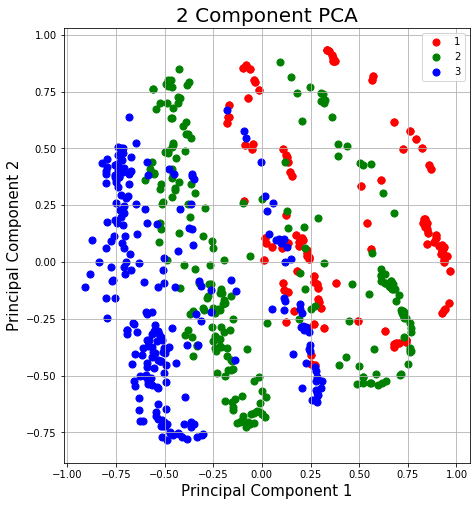

In [81]:
fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(1,2,1) 
ax1.set_xlabel('Principal Component 1', fontsize = 15)
ax1.set_ylabel('Principal Component 2', fontsize = 15)
ax1.set_title('2 Component PCA', fontsize = 20)


targets = [1, 2, 3]
colors = 'rgb'
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Average User Rating'] == target
    ax1.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax1.legend(targets)
ax1.grid()

In [82]:
print(pca.explained_variance_ratio_)

print(pca.explained_variance_ratio_.sum())

[0.27302036 0.19036013 0.16512342 0.15592664]
0.7844305507487785


# 4.2. Train model with final dataset 

In [83]:
X = finalDf.drop(['Average User Rating'],axis =1)
y = finalDf['Average User Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# 4.2.1. KNN Model

In [84]:
K_values = np.arange(start = 3, stop = 40, step = 2)
i = 0
# create 2 list to store accuracy
acc = np.zeros(K_values.shape[0])
cross_val_acc = np.zeros(K_values.shape[0])
# create 2 lists to store the model training duration and prediction duration
train_duration = np.zeros(K_values.shape[0])
predict_duration = np.zeros(K_values.shape[0])
# create a list to store all the confusion matrices
a =np.matrix('0 0;0 0')
Con_Mat_list = [a]*(K_values.shape[0])

In [85]:
for n in K_values:
    
    start_time = time.time()
    Kneigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    train_duration[i] = time.time() - start_time
    start_time = time.time()
    y_hat = Kneigh.predict(X_test)
    predict_duration[i] = time.time() - start_time
    acc[i] = accuracy_score(y_test, y_hat)
    score=cross_val_score(Kneigh, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy',error_score=np.nan)
    cross_val_acc[i]= round(np.mean(score)*100, 2)
    Con_Mat_list[i] = confusion_matrix(y_test,y_hat)
    i +=1
 

In [86]:
cross_val_acc

array([98.88, 98.31, 97.38, 97.38, 96.82, 97.19, 97.56, 96.63, 94.76,
       93.83, 92.7 , 91.01, 90.84, 90.65, 91.03, 92.15, 91.21, 91.21,
       90.28])

In [87]:
acc

array([0.99441341, 0.98882682, 0.98882682, 0.98324022, 0.97765363,
       0.98324022, 0.97765363, 0.97765363, 0.98324022, 0.97765363,
       0.97765363, 0.97206704, 0.97206704, 0.96648045, 0.96089385,
       0.94972067, 0.94972067, 0.95530726, 0.96089385])

# After doing PCA, the K values for highest accuracy remains at 3

In [88]:
Analyse_Con_Mat(Con_Mat_list[0])

Acc_1 = 1.0, Acc_2 = 0.9836065573770492, Acc_3 = 1.0


In [89]:
train_duration[0]

0.0009989738464355469

# 4.2.2 Decision Tree Model

In [90]:
clf = tree.DecisionTreeClassifier()
start_time = time.time()
clf.fit(X_train,y_train)
train_duration = time.time() - start_time
y_pred = clf.predict(X_test)

DT_acc = accuracy_score(y_test, y_pred)
DT_Con_Mat_= confusion_matrix(y_test,y_pred)

In [91]:
DT_acc

0.9888268156424581

In [92]:
train_duration

0.003989219665527344

In [93]:
DT_Con_Mat_

array([[67,  0,  0],
       [ 0, 59,  2],
       [ 0,  0, 51]], dtype=int64)

In [94]:
Analyse_Con_Mat(DT_Con_Mat_)

Acc_1 = 1.0, Acc_2 = 0.9672131147540983, Acc_3 = 1.0


# 4.2.3 Logistic Regression Model

In [95]:
logReg = LogisticRegression(solver = 'lbfgs')
start_time = time.time()
logReg.fit(X_train,y_train)
train_duration = time.time() - start_time
y_pred_LR = logReg.predict(X_test)
LR_acc = accuracy_score(y_test, y_pred_LR)
LR_Con_Mat_= confusion_matrix(y_test,y_pred_LR)

C:\Users\Py\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [96]:
LR_acc 

1.0

In [97]:
train_duration

0.019278287887573242

In [98]:
LR_Con_Mat_

array([[67,  0,  0],
       [ 0, 61,  0],
       [ 0,  0, 51]], dtype=int64)

In [99]:
Analyse_Con_Mat(LR_Con_Mat_)

Acc_1 = 1.0, Acc_2 = 1.0, Acc_3 = 1.0


# We can see that the result improve greatly, highest accuracy achieved increase from around 70 percent previously to close to 100 perccent for all 3 classification model.